### Whatzapp chat analysis project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

'''
Importing the text file which contains the chat of the group in read mode using utf-8 encoding!
'''

In [2]:
f = open('WhatsApp Chat with 𝐂𝐑𝐘𝐏𝐓𝐎 𝐓𝐆 @𝐂𝐇𝐀𝐌𝐏𝐈𝐎𝐍𝐒.txt', 'r', encoding = 'utf-8')
data = f.read()

In [3]:
 #data

In [4]:
# cut into pieces 1 message per line
#dummy = data.split('\n')
#dummy

# split the data into text and time separately

In [5]:
# # Extract username and mesaage in one col
# pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}.*?-\s'
# messages = re.split(pattern, data)[1:]
# print(len(messages))

# # Now extract date
# dates = re.findall(pattern, data)
# print(len(dates))

In [6]:
import re

pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}(?:\s?[AP]M)?\s-\s'

# messages (text only)
messages = re.split(pattern, data)[1:]
print(len(messages))

# dates (date+time only)
dates = re.findall(pattern, data)
print(len(dates))


9808
9808


### 
Now that we get the date part separetly and the message part separetly
we can split the date and the time separately


In [7]:
def gettimeanddate(string):
    string = string.split(',')
    date, time = string[0], string[1]
    time = time.split('-')
    time = time[0].strip()

    return date+" "+time

### We need to create a dataframe for message and date so we can have the column date for splitting

In [8]:
# creating a dataFrame for messages and their dates
df = pd.DataFrame({'user_messages' : messages,
                   'message_date' : dates})


In [9]:
df.head()

,user_messages,message_date
0,Messages and calls are end-to-end encrypted. O...,"8/5/24, 3:33 PM -"
1,"Leader Rodrique TCHAMASSE created group ""CRYPT...","7/21/22, 9:36 AM -"
2,Gnimdou Ignace added you\n,"8/5/24, 3:33 PM -"
3,+228 97 70 89 99: C'est quoi 14 s'il vous plaî...,"8/5/24, 3:48 PM -"
4,Gnimdou Ignace: Quand le marché vas atteindre ...,"8/5/24, 3:54 PM -"


### Now we can use the function to split the message_date column

In [10]:
df['message_date'] = df['message_date'].apply(lambda text:gettimeanddate(text))
df.rename(columns ={'message_date' : 'date'}, inplace = True)
df.head()

,user_messages,date
0,Messages and calls are end-to-end encrypted. O...,8/5/24 3:33 PM
1,"Leader Rodrique TCHAMASSE created group ""CRYPT...",7/21/22 9:36 AM
2,Gnimdou Ignace added you\n,8/5/24 3:33 PM
3,+228 97 70 89 99: C'est quoi 14 s'il vous plaî...,8/5/24 3:48 PM
4,Gnimdou Ignace: Quand le marché vas atteindre ...,8/5/24 3:54 PM


In [11]:
df['user_messages']

0       Messages and calls are end-to-end encrypted. O...
1       Leader Rodrique TCHAMASSE created group "CRYPT...
2                              Gnimdou Ignace added you\n
3       +228 97 70 89 99: C'est quoi 14 s'il vous plaî...
4       Gnimdou Ignace: Quand le marché vas atteindre ...
                              ...                        
9803        Gnimdou Ignace: Père noël est sur ces nerfs\n
9804    +228 90 49 86 57: Gagner et investir est une b...
9805                  +228 96 56 97 30: <Media omitted>\n
9806                  +228 91 79 96 10: <Media omitted>\n
9807    +228 92 57 77 00: On ne peut pas échappé à sa ...
Name: user_messages, Length: 9808, dtype: object

### we need to split the username from the message and the notification too 

In [12]:
users = []
messages = []
for message in df['user_messages']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])

    else:
        users.append('Group Notification')
        messages.append(entry[0])

df['User'] = users
df['message'] = messages
# we need this function becaus we don want to get all the message or the media

def getstring(text):
    return text.split('\n')[0]
df['message'] = df['message'].apply(lambda text:getstring(text))


In [13]:
df['User']

0       Group Notification
1       Group Notification
2       Group Notification
3         +228 97 70 89 99
4           Gnimdou Ignace
               ...        
9803        Gnimdou Ignace
9804      +228 90 49 86 57
9805      +228 96 56 97 30
9806      +228 91 79 96 10
9807      +228 92 57 77 00
Name: User, Length: 9808, dtype: object

In [14]:
df['message']

0       Messages and calls are end-to-end encrypted. O...
1       Leader Rodrique TCHAMASSE created group "CRYPT...
2                                Gnimdou Ignace added you
3                         C'est quoi 14 s'il vous plaît ?
4           Quand le marché vas atteindre 14$ comme prix.
                              ...                        
9803                          Père noël est sur ces nerfs
9804                                                     
9805                                      <Media omitted>
9806                                      <Media omitted>
9807    On ne peut pas échappé à sa dans cette générat...
Name: message, Length: 9808, dtype: object

In [15]:
df = df.drop(['user_messages'], axis = 1)
df = df[['message', 'date', 'User']]
df = df.rename(columns = { 'message': 'Message', 'date' : 'Date'})
df.head()

,Message,Date,User
0,Messages and calls are end-to-end encrypted. O...,8/5/24 3:33 PM,Group Notification
1,"Leader Rodrique TCHAMASSE created group ""CRYPT...",7/21/22 9:36 AM,Group Notification
2,Gnimdou Ignace added you,8/5/24 3:33 PM,Group Notification
3,C'est quoi 14 s'il vous plaît ?,8/5/24 3:48 PM,+228 97 70 89 99
4,Quand le marché vas atteindre 14$ comme prix.,8/5/24 3:54 PM,Gnimdou Ignace


### the date is in string we need to convert this in date time format and extract the date, time , hours...so on

In [16]:
df['Only date'] = pd.to_datetime(df['Date']).dt.date
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month_num'] = pd.to_datetime(df['Date']).dt.month
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Day_name'] =pd.to_datetime(df['Date']).dt.day_name()
df['Hour'] = pd.to_datetime(df['Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Date']).dt.minute
df.head()
                              

C:\Users\rakab\AppData\Local\Temp\ipykernel_20932\803480883.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Only date'] = pd.to_datetime(df['Date']).dt.date
C:\Users\rakab\AppData\Local\Temp\ipykernel_20932\803480883.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['Date']).dt.year
C:\Users\rakab\AppData\Local\Temp\ipykernel_20932\803480883.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month_num'] = pd.to_datetime(df['Date']).dt.month
C:\Users\rakab\AppData\Local\Temp\ipykernel_20932\803480883.py:4: UserWarning: Could not 

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. O...,8/5/24 3:33 PM,Group Notification,2024-08-05,2024,8,August,5,Monday,15,33
1,"Leader Rodrique TCHAMASSE created group ""CRYPT...",7/21/22 9:36 AM,Group Notification,2022-07-21,2022,7,July,21,Thursday,9,36
2,Gnimdou Ignace added you,8/5/24 3:33 PM,Group Notification,2024-08-05,2024,8,August,5,Monday,15,33
3,C'est quoi 14 s'il vous plaît ?,8/5/24 3:48 PM,+228 97 70 89 99,2024-08-05,2024,8,August,5,Monday,15,48
4,Quand le marché vas atteindre 14$ comme prix.,8/5/24 3:54 PM,Gnimdou Ignace,2024-08-05,2024,8,August,5,Monday,15,54


In [17]:
df[df['User']== 'Gnimdou Ignace']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
4,Quand le marché vas atteindre 14$ comme prix.,8/5/24 3:54 PM,Gnimdou Ignace,2024-08-05,2024,8,August,5,Monday,15,54
97,<Media omitted>,8/13/24 11:55 AM,Gnimdou Ignace,2024-08-13,2024,8,August,13,Tuesday,11,55
102,<Media omitted>,8/13/24 1:00 PM,Gnimdou Ignace,2024-08-13,2024,8,August,13,Tuesday,13,0
105,<Media omitted>,8/13/24 2:33 PM,Gnimdou Ignace,2024-08-13,2024,8,August,13,Tuesday,14,33
109,,8/14/24 8:47 AM,Gnimdou Ignace,2024-08-14,2024,8,August,14,Wednesday,8,47
...,...,...,...,...,...,...,...,...,...,...,...
9704,<Media omitted>,12/18/25 3:20 PM,Gnimdou Ignace,2025-12-18,2025,12,December,18,Thursday,15,20
9730,C'est un business...que tu m'offre. Je suis di...,12/20/25 6:07 AM,Gnimdou Ignace,2025-12-20,2025,12,December,20,Saturday,6,7
9734,<Media omitted>,12/20/25 6:09 AM,Gnimdou Ignace,2025-12-20,2025,12,December,20,Saturday,6,9
9802,<Media omitted>,12/23/25 12:42 PM,Gnimdou Ignace,2025-12-23,2025,12,December,23,Tuesday,12,42


### count how many word we count on the messages

In [18]:
words = []
for message in df['Message']:
    words.extend(message.split())
    
print(len(words))

53853


In [19]:
df[(df['Message'] == '<Media omited>') & (df['User'] == 'Gnimdou Ignace')].shape

(0, 11)

In [20]:
df['Message'].unique()

array(['Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.',
       'Leader Rodrique TCHAMASSE created group "CRYPTO TG @CHAMPION"',
       'Gnimdou Ignace added you', ...,
       "Coach Gnimdou viens confirmer avec les gifles que l'autre gar à prit sur ton statut là.",
       'Père noël est sur ces nerfs',
       'On ne peut pas échappé à sa dans cette génération et la génération avenue'],
      shape=(4880,), dtype=object)

In [21]:
df[df['Message'] =='<Media omitted>']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
14,<Media omitted>,8/7/24 4:20 AM,Leader Rodrique TCHAMASSE,2024-08-07,2024,8,August,7,Wednesday,4,20
15,<Media omitted>,8/7/24 4:20 AM,Leader Rodrique TCHAMASSE,2024-08-07,2024,8,August,7,Wednesday,4,20
16,<Media omitted>,8/7/24 4:20 AM,Leader Rodrique TCHAMASSE,2024-08-07,2024,8,August,7,Wednesday,4,20
17,<Media omitted>,8/7/24 4:21 AM,Leader Rodrique TCHAMASSE,2024-08-07,2024,8,August,7,Wednesday,4,21
18,<Media omitted>,8/7/24 4:21 AM,Leader Rodrique TCHAMASSE,2024-08-07,2024,8,August,7,Wednesday,4,21
...,...,...,...,...,...,...,...,...,...,...,...
9796,<Media omitted>,12/23/25 11:35 AM,+228 91 60 90 12,2025-12-23,2025,12,December,23,Tuesday,11,35
9797,<Media omitted>,12/23/25 12:26 PM,Leader Rodrique TCHAMASSE,2025-12-23,2025,12,December,23,Tuesday,12,26
9802,<Media omitted>,12/23/25 12:42 PM,Gnimdou Ignace,2025-12-23,2025,12,December,23,Tuesday,12,42
9805,<Media omitted>,12/23/25 1:24 PM,+228 96 56 97 30,2025-12-23,2025,12,December,23,Tuesday,13,24


In [22]:
df['User'].value_counts().head()

User
Leader Rodrique TCHAMASSE    2596
Group Notification            564
Gnimdou Ignace                505
Leader ARIEL                  477
Lackman TG                    385
Name: count, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Leader Rodrique TCHAMASSE'),
  Text(1, 0, 'Group Notification'),
  Text(2, 0, 'Gnimdou Ignace'),
  Text(3, 0, 'Leader ARIEL'),
  Text(4, 0, 'Lackman TG')])

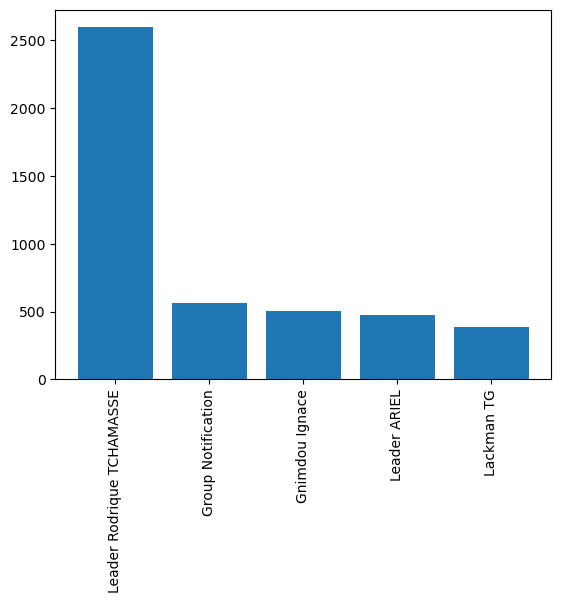

In [23]:
counts = df['User'].value_counts().head()
plt.bar(counts.index, counts.values)
plt.xticks(rotation = 'vertical')

In [24]:
# count how many time a word is used
wordmap = {}
for message in df['Message']:
    dummy = message.split()
    for word in dummy:
        if word in wordmap:
            wordmap[word]+=1
        else:
            wordmap[word] =1
wordmap = dict(sorted(wordmap.items(), key = lambda x:x[1], reverse = True))
wordmap
                      

{'<Media': 3949,
 'omitted>': 3949,
 'de': 1098,
 'le': 737,
 'les': 679,
 'la': 673,
 'a': 583,
 'et': 529,
 'pour': 477,
 'à': 443,
 'pas': 428,
 '~': 390,
 'que': 371,
 'en': 346,
 'Merci': 337,
 'des': 328,
 'est': 324,
 'added': 321,
 'un': 321,
 'qui': 298,
 'was': 295,
 'vous': 288,
 'je': 279,
 'on': 264,
 'sur': 252,
 'ce': 250,
 "c'est": 243,
 'message': 242,
 'ne': 238,
 '+228': 231,
 'dans': 230,
 'leader': 207,
 'une': 196,
 'il': 190,
 'group': 186,
 "C'est": 186,
 ',': 186,
 'du': 181,
 'joined': 181,
 'using': 181,
 'link.': 181,
 'Leader': 176,
 'nous': 176,
 '?': 167,
 'ça': 155,
 'This': 152,
 'deleted': 151,
 'Je': 148,
 'avec': 142,
 'Rodrique': 141,
 'beaucoup': 138,
 'plus': 131,
 'tu': 131,
 'TCHAMASSE': 127,
 'au': 127,
 'se': 125,
 'Le': 124,
 'sont': 123,
 'On': 123,
 'tout': 122,
 'Il': 117,
 'Bonjour': 117,
 'mon': 110,
 'crypto': 105,
 'si': 105,
 'fait': 102,
 'tous': 100,
 'ou': 99,
 'va': 98,
 'mais': 98,
 'Les': 97,
 'comme': 96,
 'suis': 95,
 'faire':

In [27]:
# Find the 20 top word use
from collections import Counter
words = []
for message in df['Message']:
    words.extend(message.split())
wordmap = dict(Counter(words).most_common(20))
wordmap = dict(sorted(wordmap.items(), key = lambda x:x[1], reverse = True))
newdf = pd.DataFrame(wordmap.items())
newdf



,0,1
0,<Media,3949
1,omitted>,3949
2,de,1098
3,le,737
4,les,679
5,la,673
6,a,583
7,et,529
8,pour,477
9,à,443


In [29]:
temp = df[(df['User']!= 'Group Notification') & (df['Message']!='<Media omitted>')]
temp

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
3,C'est quoi 14 s'il vous plaît ?,8/5/24 3:48 PM,+228 97 70 89 99,2024-08-05,2024,8,August,5,Monday,15,48
4,Quand le marché vas atteindre 14$ comme prix.,8/5/24 3:54 PM,Gnimdou Ignace,2024-08-05,2024,8,August,5,Monday,15,54
5,Ok d'accord. Merci gars,8/5/24 4:55 PM,+228 97 70 89 99,2024-08-05,2024,8,August,5,Monday,16,55
6,https://cryptoast.fr/coinbase-accuse-viole-loi...,8/6/24 11:20 AM,Leader Rodrique TCHAMASSE,2024-08-06,2024,8,August,6,Tuesday,11,20
7,,8/6/24 11:20 AM,Leader Rodrique TCHAMASSE,2024-08-06,2024,8,August,6,Tuesday,11,20
...,...,...,...,...,...,...,...,...,...,...,...
9800,🤏🏾😎,12/23/25 12:33 PM,Leader Rodrique TCHAMASSE,2025-12-23,2025,12,December,23,Tuesday,12,33
9801,Coach Gnimdou viens confirmer avec les gifles ...,12/23/25 12:38 PM,+228 91 87 77 71,2025-12-23,2025,12,December,23,Tuesday,12,38
9803,Père noël est sur ces nerfs,12/23/25 12:44 PM,Gnimdou Ignace,2025-12-23,2025,12,December,23,Tuesday,12,44
9804,,12/23/25 1:09 PM,+228 90 49 86 57,2025-12-23,2025,12,December,23,Tuesday,13,9


In [30]:
stopword = pd.read_csv("french_stopwords.csv")
stopword

,token;category
0,a;avoir
1,à;prepositions
2,abord;other
3,actuellement;time
4,afin;other
...,...
1079,yeah;interjections
1080,youpi;interjections
1081,zou;interjections
1082,zut;interjections


In [33]:
# a code to select the 20 meaningfull word
def gettopwords(selecteduser, temp):
    # get the stop word
    stopwords =  stopword
    temp = temp[(temp['User']!='Group Notification') & (temp['Message']!='<Media omitted>')]
    words = []
    if selecteduser!='overall':
        temp = temp[temp['User'] == selecteduser]
        
    for message in temp['Message']:
        
        message = message.lower()
        for word in message.split():
            
            if word not in stopwords:
                words.append(word)

    mostcommon  = pd.DataFrame(Counter(words).most_common(20))
    return mostcommon
mostcommon = gettopwords('overall', temp)
mostcommon
            

,0,1
0,de,1129
1,le,873
2,les,793
3,la,763
4,et,582
5,pour,531
6,à,465
7,pas,453
8,c'est,433
9,je,432


## let's work on emodji

In [35]:
pip install emoji


   ---------------------------------------- 0.0/608.4 kB ? eta -:--:--
   ---------------------------------------- 608.4/608.4 kB 5.6 MB/s  0:00:00


In [36]:
import emoji

In [41]:
# find emoji in our message
def emojihelp(selecteduser, df):
    if selecteduser!= 'Overall':
        df = df[df['User']==selecteduser]
    emojis = []
    for message in df['Message']:
        emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
    emojidf = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
    return emojidf
dfmoji = emojihelp('Overall', df)
dfmoji

,0,1
0,🤣,395
1,😂,332
2,😁,144
3,😎,125
4,🙏,109
...,...,...
225,🥂,1
226,🍾,1
227,📲,1
228,😷,1


In [42]:
dfmoji.columns = ['Emoji', 'Count']
dfmoji

,Emoji,Count
0,🤣,395
1,😂,332
2,😁,144
3,😎,125
4,🙏,109
...,...,...
225,🥂,1
226,🍾,1
227,📲,1
228,😷,1


In [43]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. O...,8/5/24 3:33 PM,Group Notification,2024-08-05,2024,8,August,5,Monday,15,33
1,"Leader Rodrique TCHAMASSE created group ""CRYPT...",7/21/22 9:36 AM,Group Notification,2022-07-21,2022,7,July,21,Thursday,9,36
2,Gnimdou Ignace added you,8/5/24 3:33 PM,Group Notification,2024-08-05,2024,8,August,5,Monday,15,33
3,C'est quoi 14 s'il vous plaît ?,8/5/24 3:48 PM,+228 97 70 89 99,2024-08-05,2024,8,August,5,Monday,15,48
4,Quand le marché vas atteindre 14$ comme prix.,8/5/24 3:54 PM,Gnimdou Ignace,2024-08-05,2024,8,August,5,Monday,15,54


In [49]:
# we wnat to write a code which can break message per month by 
#year so we can see in a chosen moth our many message this group wrote

def monthtimeline(selecteduser, df):
    temp = df.groupby(['Year', 'Month_num', 'Month']).count()['Message'].reset_index().sort_values(['Message'])
    time = []
    for i in range(temp.shape[0]):
        time.append(temp['Month'][i]+"-"+str(temp['Year'][i]))
    temp['time'] = time
    return temp

In [50]:
timeline = monthtimeline('Overall', df)
timeline.head()

,Year,Month_num,Month,Message,time
0,2022,7,July,1,July-2022
17,2025,12,December,264,August-2024
1,2024,8,August,289,September-2024
2,2024,9,September,299,October-2024
8,2025,3,March,416,November-2024


In [51]:
temp1 = df['Day_name'].value_counts()

In [52]:
temp1

Day_name
Monday       1622
Thursday     1482
Sunday       1470
Wednesday    1394
Friday       1349
Tuesday      1254
Saturday     1237
Name: count, dtype: int64

In [53]:
list(temp1.index)

['Monday', 'Thursday', 'Sunday', 'Wednesday', 'Friday', 'Tuesday', 'Saturday']

In [54]:
list(temp1.values)

[np.int64(1622),
 np.int64(1482),
 np.int64(1470),
 np.int64(1394),
 np.int64(1349),
 np.int64(1254),
 np.int64(1237)]

In [57]:
temp2 = df['Month'].value_counts()
temp2

Month
November     2154
October      1357
August        854
April         776
September     771
December      765
January       681
May           567
February      545
June          483
July          439
March         416
Name: count, dtype: int64

In [59]:
list(temp2.index), list(temp2.values)

(['November',
  'October',
  'August',
  'April',
  'September',
  'December',
  'January',
  'May',
  'February',
  'June',
  'July',
  'March'],
 [np.int64(2154),
  np.int64(1357),
  np.int64(854),
  np.int64(776),
  np.int64(771),
  np.int64(765),
  np.int64(681),
  np.int64(567),
  np.int64(545),
  np.int64(483),
  np.int64(439),
  np.int64(416)])

## Conclusion
In This project, I analyse whatzap discussion of a groupwhatzapp to see the activity of the group